# MVP Machine Learning & Analytics

Nome: Elvio

Matrícula: 40530010055

Dataset: https://portal.inmet.gov.br/dadoshistoricos

# Descrição do Problema

O objetivo deste projeto é desenvolver um modelo de ciência de dados capaz de prever a intensidade da chuva em um determinado dia, utilizando como base dados meteorológicos da cidade de Aracaju. Trata-se de uma tarefa de classificação supervisionada, em que a variável alvo é a intensidade da chuva, categorizada a partir da quantidade de precipitação acumulada em milímetros por hora da seguinte forma:

**Chuva Fraca:** bold text abaixo de 25 mm/h.

**Chuva Moderada:** entre 25 mm/h e 50 mm/h.

**Chuva Forte**: entre 50 mm/h e 60 mm/h.

Chuva Extremamente Forte: acima de 60 mm/h ou 100 mm/dia, podendo ocasionar sérios impactos, como alagamentos, transbordamentos de rios e deslizamentos de terra.

A definição clara desses níveis de risco é fundamental para antecipar e comunicar potenciais perigos à população. Essas informações, aliadas às orientações da defesa civil, tornam-se ferramentas importantes para apoiar a tomada de decisões preventivas e reduzir os impactos de eventos climáticos extremos.

A cidade de Aracaju foi escolhida como estudo de caso devido à recorrência de alagamentos no período chuvoso, o que a torna um cenário relevante para a análise de risco climático. O dataset utilizado foi obtido a partir dos dados abertos do Instituto Nacional de Meteorologia (INMET), abrangendo registros dos últimos 10 anos, fornecendo assim uma base histórica consistente para a construção e avaliação do modelo preditivo.

site: https://portal.inmet.gov.br/dadoshistoricos

# Biliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random, sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [2]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 42


# Carga e preparação dos dados

### Carregamento e concatenação dos dados
O objetivo desta etapa é unificar os dados de diferentes anos em um único conjunto, de forma a contemplar o período de 2015 até 31/08/2025, correspondente aos registros mais recentes disponibilizados pelo INMET. Para isso, o código apresentado carrega os dados de cada ano em variáveis separadas, verifica o tamanho de cada conjunto e, em seguida, realiza a concatenação em uma única variável consolidada.

In [3]:
AJU21 = pd.read_csv('https://raw.githubusercontent.com/Ebmf/Aracaju_INMET/main/INMET_NE_SE_A409_ARACAJU_01-01-2021_A_31-12-2021.CSV', delimiter=';', encoding='latin-1', skiprows=8, low_memory=False)
AJU22 = pd.read_csv('https://raw.githubusercontent.com/Ebmf/Aracaju_INMET/main/INMET_NE_SE_A409_ARACAJU_01-01-2022_A_31-12-2022.CSV', delimiter=';', encoding='latin-1', skiprows=8, low_memory=False)
AJU23 = pd.read_csv('https://raw.githubusercontent.com/Ebmf/Aracaju_INMET/main/INMET_NE_SE_A409_ARACAJU_01-01-2023_A_31-12-2023.CSV', delimiter=';', encoding='latin-1', skiprows=8, low_memory=False)
AJU24 = pd.read_csv('https://raw.githubusercontent.com/Ebmf/Aracaju_INMET/main/INMET_NE_SE_A409_ARACAJU_01-01-2024_A_31-12-2024.CSV', delimiter=';', encoding='latin-1', skiprows=8, low_memory=False)
AJU25 = pd.read_csv('https://raw.githubusercontent.com/Ebmf/Aracaju_INMET/main/INMET_NE_SE_A409_ARACAJU_01-01-2025_A_31-08-2025.CSV', delimiter=';', encoding='latin-1', skiprows=8, low_memory=False)
AJU20 = pd.read_csv('https://raw.githubusercontent.com/Ebmf/Aracaju_INMET/main/INMET_NE_SE_A409_ARACAJU_01-01-2020_A_31-12-2020.CSV', delimiter=';', encoding='latin-1', skiprows=8, low_memory=False)
AJU19 = pd.read_csv('https://raw.githubusercontent.com/Ebmf/Aracaju_INMET/main/INMET_NE_SE_A409_ARACAJU_01-01-2019_A_31-12-2019.CSV', delimiter=';', encoding='latin-1', skiprows=8, low_memory=False)
AJU18 = pd.read_csv('https://raw.githubusercontent.com/Ebmf/Aracaju_INMET/main/INMET_NE_SE_A409_ARACAJU_01-01-2018_A_31-12-2018.CSV', delimiter=';', encoding='latin-1', skiprows=8, low_memory=False)
AJU17 = pd.read_csv('https://raw.githubusercontent.com/Ebmf/Aracaju_INMET/main/INMET_NE_SE_A409_ARACAJU_01-01-2017_A_31-12-2017.CSV', delimiter=';', encoding='latin-1', skiprows=8, low_memory=False)
AJU16 = pd.read_csv('https://raw.githubusercontent.com/Ebmf/Aracaju_INMET/main/INMET_NE_SE_A409_ARACAJU_01-01-2016_A_31-12-2016.CSV', delimiter=';', encoding='latin-1', skiprows=8, low_memory=False)
AJU15 = pd.read_csv('https://raw.githubusercontent.com/Ebmf/Aracaju_INMET/main/INMET_NE_SE_A409_ARACAJU_01-01-2015_A_31-12-2015.CSV', delimiter=';', encoding='latin-1', skiprows=8, low_memory=False)

In [4]:
dataframes = [AJU15,AJU16,AJU17,AJU18,AJU19,AJU20,AJU21, AJU22, AJU23, AJU24, AJU25]

for i, df_name in enumerate(['AJU15','AJU16','AJU17','AJU18','AJU19','AJU20','AJU21', 'AJU22', 'AJU23', 'AJU24', 'AJU25']):
    print(f"Columns of {df_name}:")
    print(dataframes[i].columns.tolist())
    print("-" * 30)

Columns of AJU15:
['DATA (YYYY-MM-DD)', 'HORA (UTC)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)', 'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)', 'RADIACAO GLOBAL (KJ/m²)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'TEMPERATURA DO PONTO DE ORVALHO (°C)', 'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)', 'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)', 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)', 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)', 'UMIDADE RELATIVA DO AR, HORARIA (%)', 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)', 'VENTO, VELOCIDADE HORARIA (m/s)', 'Unnamed: 19']
------------------------------
Columns of AJU16:
['DATA (YYYY-MM-DD)', 'HORA (UTC)', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)', 'PRESSÃO ATMOS

In [5]:
dataframes = [AJU15,AJU16,AJU17,AJU18,AJU19,AJU20,AJU21, AJU22, AJU23, AJU24, AJU25]
df_names = ['AJU15','AJU16','AJU17','AJU18','AJU19','AJU20','AJU21', 'AJU22', 'AJU23', 'AJU24', 'AJU25']

for i, df in enumerate(dataframes):
    print(f"Tamanho de {df_names[i]}: {df.shape}")

Tamanho de AJU15: (8760, 20)
Tamanho de AJU16: (8784, 20)
Tamanho de AJU17: (8760, 20)
Tamanho de AJU18: (8760, 20)
Tamanho de AJU19: (8760, 20)
Tamanho de AJU20: (8784, 20)
Tamanho de AJU21: (8760, 20)
Tamanho de AJU22: (8760, 20)
Tamanho de AJU23: (8760, 20)
Tamanho de AJU24: (8784, 20)
Tamanho de AJU25: (5832, 20)


In [6]:
dataframes_to_rename = [AJU15, AJU16, AJU17, AJU18]
column_mapping = {
    'DATA (YYYY-MM-DD)': 'Data',
    'HORA (UTC)': 'Hora UTC'
}

for df in dataframes_to_rename:
    df.rename(columns=column_mapping, inplace=True)

In [7]:
df = pd.concat([AJU15,AJU16,AJU17,AJU18,AJU19,AJU20,AJU21, AJU22, AJU23, AJU24, AJU25], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93504 entries, 0 to 93503
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Data                                                   93504 non-null  object 
 1   Hora UTC                                               93504 non-null  object 
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       85404 non-null  object 
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  85362 non-null  object 
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        85403 non-null  object 
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       85403 non-null  object 
 6   RADIACAO GLOBAL (KJ/m²)                                39958 non-null  object 
 7   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           77826 non-null  object 
 8   TEMPERATURA DO PONTO DE ORVALHO (°C)          

In [8]:
display(df.head())

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),...,TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19,RADIACAO GLOBAL (Kj/m²)
0,2015-01-01,00:00,0,1015,1015,"1014,4",-9999,"26,7",22,"26,8",...,"22,9",22,80.0,75.0,76.0,91.0,"8,2","4,4",NaN,NaN
1,2015-01-01,01:00,0,"1015,2","1015,3",1015,-9999,"26,6","22,6","26,8",...,"22,7","22,1",79.0,76.0,79.0,88.0,"7,7","4,1",NaN,NaN
2,2015-01-01,02:00,0,"1014,6","1015,2","1014,6",-9999,"26,4","22,2","26,6",...,"22,7","21,9",79.0,76.0,78.0,82.0,"7,6","4,1",NaN,NaN
3,2015-01-01,03:00,0,"1013,7","1014,6","1013,7",-9999,"26,2","22,4","26,5",...,"22,5",22,79.0,77.0,79.0,83.0,"7,3","3,5",NaN,NaN
4,2015-01-01,04:00,0,"1013,4","1013,7","1013,4",-9999,"26,3","22,1","26,4",...,"22,4","21,9",79.0,77.0,78.0,80.0,"7,3","4,6",NaN,NaN


### Colunas de interesse
Nesta etapa, foram selecionadas apenas as colunas de interesse para direcionar a exploração dos dados. Embora a predição do volume de chuva possa exigir variáveis mais complexas, optou-se por um modelo enxuto, priorizando simplicidade e interpretabilidade.

In [9]:
selected_columns = [
    'Data',
    'Hora UTC',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, VELOCIDADE HORARIA (m/s)'
]

df_selected = df[selected_columns]
display(df_selected.head())

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)","UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2015-01-01,00:00,0,1015,"26,7",76.0,"4,4"
1,2015-01-01,01:00,0,"1015,2","26,6",79.0,"4,1"
2,2015-01-01,02:00,0,"1014,6","26,4",78.0,"4,1"
3,2015-01-01,03:00,0,"1013,7","26,2",79.0,"3,5"
4,2015-01-01,04:00,0,"1013,4","26,3",78.0,"4,6"


In [10]:
# Ensure df_selected is a copy to avoid SettingWithCopyWarning
df_selected = df_selected.copy()

df_selected.loc[:, 'Data_Hora'] = df_selected['Data'] + ' ' + df_selected['Hora UTC'].str.replace(' UTC', '')
df_selected.loc[:, 'Data_Hora'] = pd.to_datetime(df_selected['Data_Hora'], format='mixed', dayfirst=False)
df_selected = df_selected.drop(['Data', 'Hora UTC'], axis=1)
display(df_selected.head())

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)","UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)",Data_Hora
0,0,1015,"26,7",76.0,"4,4",2015-01-01 00:00:00
1,0,"1015,2","26,6",79.0,"4,1",2015-01-01 01:00:00
2,0,"1014,6","26,4",78.0,"4,1",2015-01-01 02:00:00
3,0,"1013,7","26,2",79.0,"3,5",2015-01-01 03:00:00
4,0,"1013,4","26,3",78.0,"4,6",2015-01-01 04:00:00


### Exploração dos Dados

Esta etapa é fundamental para criar o modelo, permitindo entender sua construção, interpretar respostas e definir os inputs necessários. Foi feito um diagnóstico dos dados para identificar suas características, ajustar tipos quando necessário e analisar a distribuição e os intervalos de cada coluna. Com isso, os dados ficaram prontos para a geração dos modelos.

In [11]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93504 entries, 0 to 93503
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       85404 non-null  object 
 1   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  85362 non-null  object 
 2   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           77826 non-null  object 
 3   UMIDADE RELATIVA DO AR, HORARIA (%)                    70834 non-null  float64
 4   VENTO, VELOCIDADE HORARIA (m/s)                        85404 non-null  object 
 5   Data_Hora                                              93504 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.3+ MB


De modo geral, observa-se a necessidade de conversão de quase todas as colunas para tipos numéricos e o tratamento dos valores faltantes, principalmente nas variáveis de temperatura e umidade relativa, para garantir consistência na análise e na construção de modelos.

In [12]:
columns_to_convert = ['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, VELOCIDADE HORARIA (m/s)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'
]

for col in columns_to_convert:
    # Replace comma with period for decimal separation and convert to numeric, coercing errors
    df_selected[col] = df_selected[col].astype(str).str.replace(',', '.', regex=False)
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')

df_selected['Data_Hora'] = pd.to_datetime(df_selected['Data_Hora'])

In [13]:
df_selected.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)","UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)",Data_Hora
count,85404.000000,85362.000000,77826.000000,70834.000000,85404.000000,93504
mean,-766.374748,1001.164701,13.645446,16.182638,-909.185170,2020-05-01 23:30:00
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2015-01-01 00:00:00
25%,0.000000,1012.200000,25.300000,60.000000,1.000000,2017-08-31 23:45:00
50%,0.000000,1014.000000,26.700000,66.000000,2.000000,2020-05-01 23:30:00
75%,0.000000,1016.100000,28.100000,72.000000,3.300000,2022-12-31 23:15:00
max,48.600000,1024.200000,39.400000,100.000000,8.700000,2025-08-31 23:00:00
std,2660.289057,378.615162,362.728661,707.842187,2878.539689,NaN


A tabela mostra que a maioria dos dados está concentrada em faixas de valores realistas para as variáveis climáticas, mas há uma presença significativa de valores **-9999** para as variáveis de Pressão Atmosférica, Temperatura, Umidade e Velocidade do Vento. Esses valores indicam dados ausentes ou inválidos, o que sugere a necessidade de um tratamento de dados antes de qualquer análise mais aprofundada, para garantir que as estatísticas reflitam corretamente as condições observadas.

In [14]:
# Select only numeric columns for filtering
numeric_cols = df_selected.select_dtypes(include=np.number).columns

# Filter out rows where any numeric column has a negative value
df_filtered = df_selected[(df_selected[numeric_cols] >= 0).all(axis=1)].copy()

# Display the info and describe of the filtered dataframe to see the effect
display(df_filtered.describe())

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)","UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)",Data_Hora
count,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,51635
mean,0.137941,1013.799299,27.054393,65.682095,2.388004,2019-07-16 01:39:32.925341440
min,0.000000,1004.700000,19.300000,7.000000,0.000000,2015-01-01 00:00:00
25%,0.000000,1012.000000,25.600000,59.000000,1.200000,2017-03-11 12:30:00
50%,0.000000,1013.600000,26.900000,66.000000,2.300000,2019-04-09 09:00:00
75%,0.000000,1015.500000,28.400000,72.000000,3.600000,2021-01-24 01:30:00
max,42.600000,1022.000000,39.400000,100.000000,8.500000,2024-10-17 16:00:00
std,1.013963,2.509076,2.149690,10.102765,1.526240,NaN


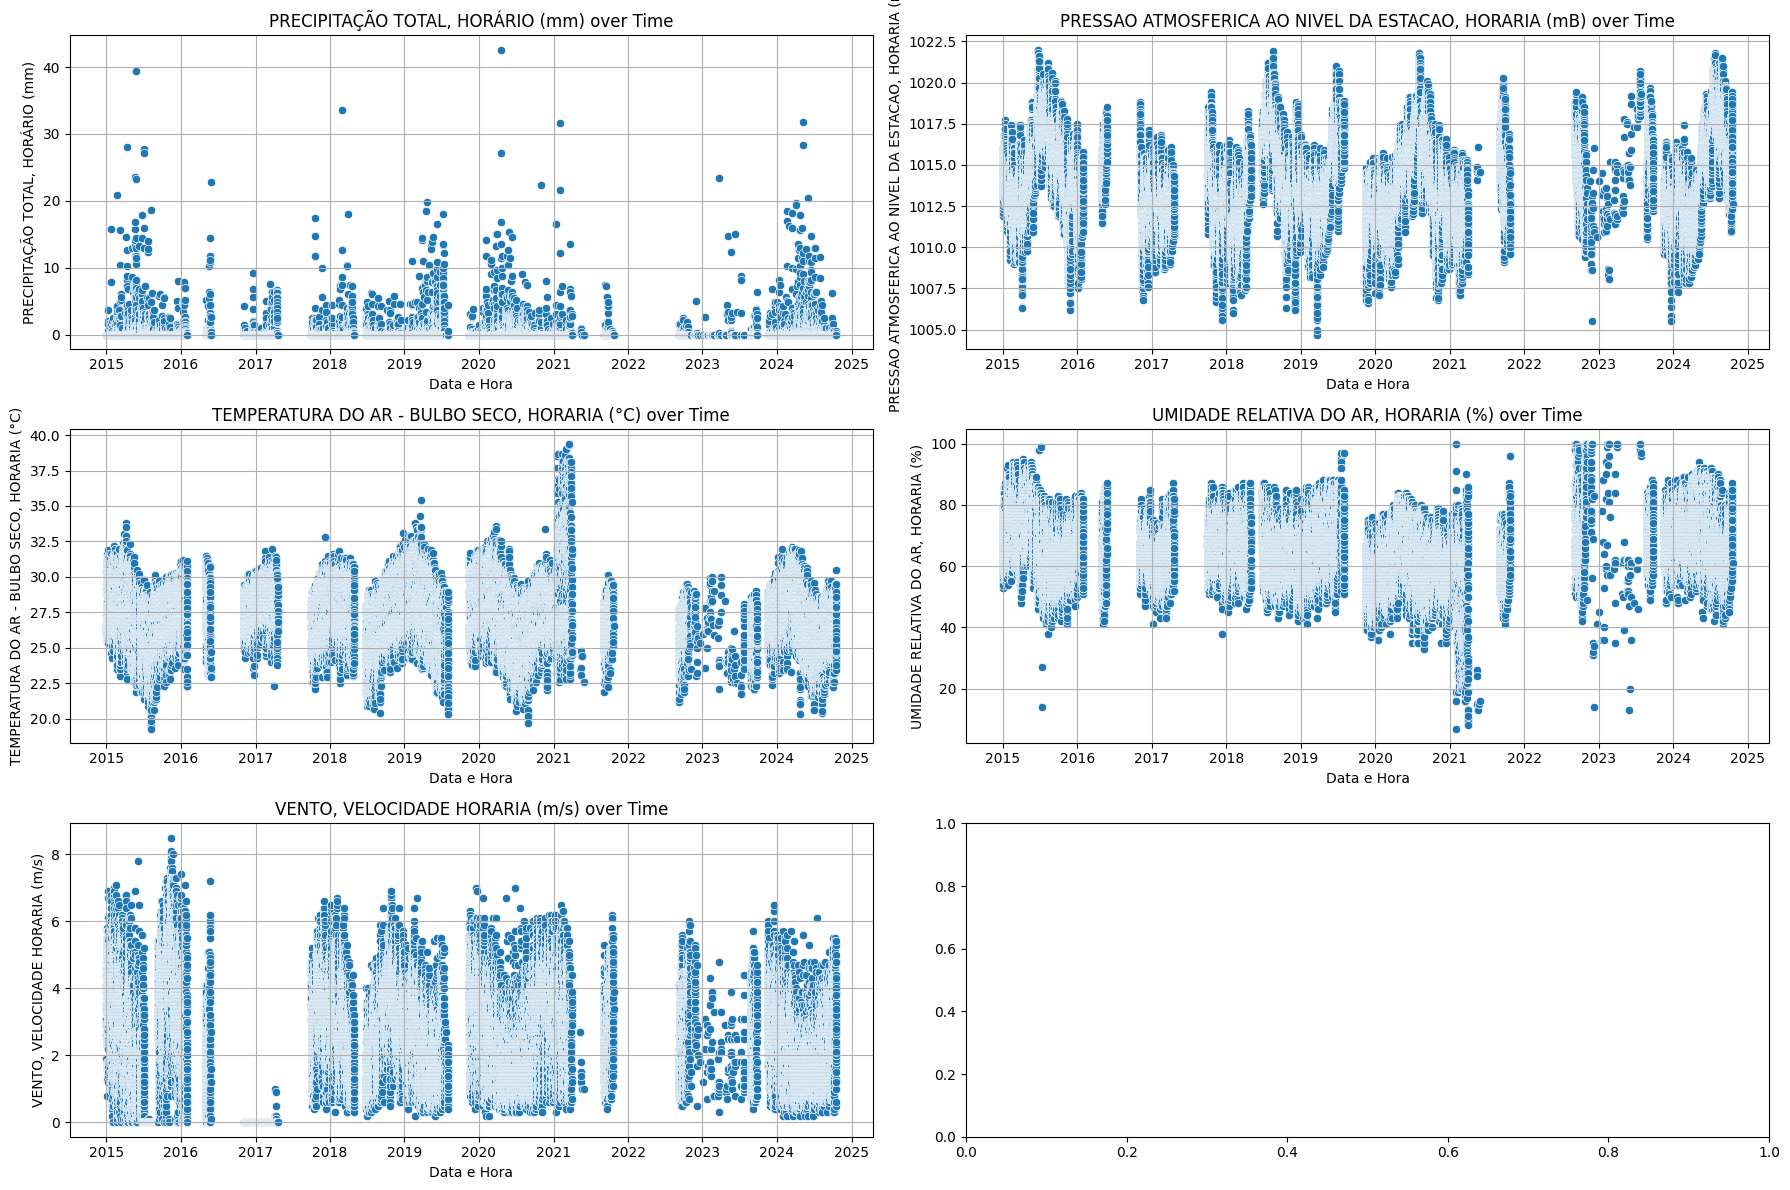

In [15]:
# Define the columns to plot against Data_Hora
columns_to_plot = ['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, VELOCIDADE HORARIA (m/s)'
]

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a plot for each selected column against Data_Hora in the subplots
for i, col in enumerate(columns_to_plot):
    sns.scatterplot(x=df_filtered['Data_Hora'], y=df_filtered[col], ax=axes[i])
    axes[i].set_title(f'{col} over Time')
    axes[i].set_xlabel('Data e Hora')
    axes[i].set_ylabel(col)
    axes[i].grid(True)

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
plt.show()

As observações destacam que enquanto variáveis como a pressão atmosférica mantêm uma alta completude de dados, outras, especialmente a temperatura, a umidade e a velocidade do vento, enfrentam desafios consideráveis devido a grandes lacunas de tempo. A precipitação, por sua vez, tem um padrão de dados irregular, que exige uma análise mais detalhada para diferenciar entre a ausência de chuva e a ausência de registro. O tratamento dessas lacunas e a investigação dos motivos por trás da inconsistência na coleta de dados são passos cruciais para garantir a precisão de qualquer análise futura.

Para dar inicio ao tratamentos dos dados faltantes, sera feito a retirada dos dados faltantes da variavel de objeto de interesse 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'

In [16]:
df2=df_filtered.copy()
df2.dropna(subset=['UMIDADE RELATIVA DO AR, HORARIA (%)'], inplace=True)
df2.reset_index(drop=True, inplace=True)
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51635 entries, 0 to 51634
Data columns (total 6 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       51635 non-null  float64       
 1   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  51635 non-null  float64       
 2   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           51635 non-null  float64       
 3   UMIDADE RELATIVA DO AR, HORARIA (%)                    51635 non-null  float64       
 4   VENTO, VELOCIDADE HORARIA (m/s)                        51635 non-null  float64       
 5   Data_Hora                                              51635 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 2.4 MB


None

In [17]:
df2.describe()

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)","UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, VELOCIDADE HORARIA (m/s)",Data_Hora
count,51635.000000,51635.000000,51635.000000,51635.000000,51635.000000,51635
mean,0.137941,1013.799299,27.054393,65.682095,2.388004,2019-07-16 01:39:32.925341440
min,0.000000,1004.700000,19.300000,7.000000,0.000000,2015-01-01 00:00:00
25%,0.000000,1012.000000,25.600000,59.000000,1.200000,2017-03-11 12:30:00
50%,0.000000,1013.600000,26.900000,66.000000,2.300000,2019-04-09 09:00:00
75%,0.000000,1015.500000,28.400000,72.000000,3.600000,2021-01-24 01:30:00
max,42.600000,1022.000000,39.400000,100.000000,8.500000,2024-10-17 16:00:00
std,1.013963,2.509076,2.149690,10.102765,1.526240,NaN


O problema proposto neste estudo consiste em desenvolver um modelo de classificação para o risco de chuva. Atualmente, os dados encontram-se em formato numérico, sendo necessário classificá-los em categorias de risco. A partir dessa classificação, será possível gerar os modelos preditivos. Para isso, foi criada a função (def) apresentada a seguir.

Assim a classificação da intensidade da chuva é representada por valores numéricos associados a cada categoria. O número 0 indica Chuva Fraca, correspondente a precipitação inferior a 10 mm/h. O número 1 representa Chuva Moderada, para valores entre 10 mm/h e 25 mm/h. O número 2 corresponde a Chuva Forte, quando a precipitação está entre 25 mm/h e 50 mm/h. Por fim, o número 3 indica Chuva Extremamente Forte, associada a valores iguais ou superiores a 51 mm/h.

In [18]:
def classify_precipitation(precipitation):
    if precipitation < 10:
        return 0  #'Chuva Fraca'
    elif 10 <= precipitation < 25:
        return 1 #'Chuva Moderada'
    elif 25 <= precipitation < 50:
        return 2 #'Chuva Forte'
    elif precipitation >= 51:
        return 3 #'Chuva Extremamente Forte'
    else:
        return 'Desconhecido' # Handle potential NaN or other values

In [19]:
df2['classificação de risco'] = df2['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].apply(classify_precipitation)

# Display the value counts for the new column to see the distribution
display(df2['classificação de risco'].value_counts())

,count
classificação de risco,
0,51506
1,119
2,10


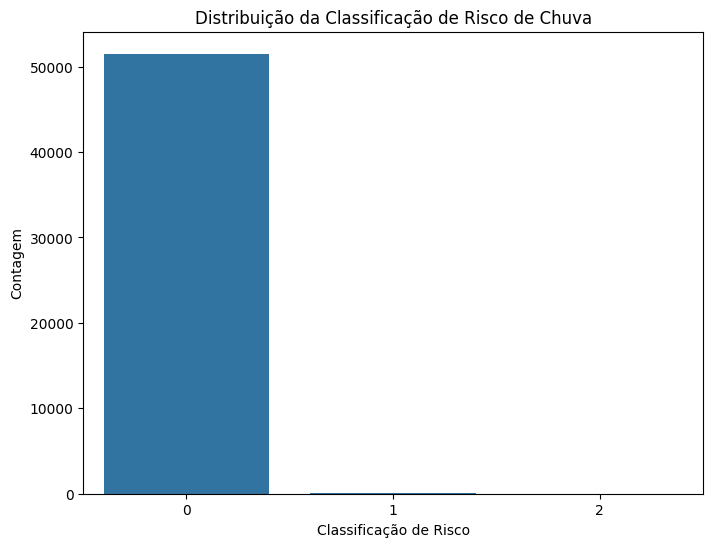

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='classificação de risco', data=df2)
plt.title('Distribuição da Classificação de Risco de Chuva')
plt.xlabel('Classificação de Risco')
plt.ylabel('Contagem')
plt.show()

A predominância de "Chuva Fraca" demonstra um padrão climático com poucas ocorrências de eventos de alta intensidade. Essa distribuição sugere um clima relativamente estável no que diz respeito à intensidade da chuva, com pouca ou nenhuma incidência de chuvas que poderiam causar grandes transtornos ou danos.No ponto de vista dos dados, há um desbalanceamento muito grande entre as classes,isso é importante se você for usar esses dados para modelos preditivos, porque modelos podem tender a prever sempre a classe majoritária (Chuva Fraca).

# Balanceamento dos dados

Quando um modelo de classificação é treinado com dados desbalanceados, ele tende a favorecer a classe majoritária. No seu caso, isso significa que o modelo poderia prever “chuva fraca” na maior parte do tempo, alcançando uma boa precisão geral, mas falhando em identificar corretamente as ocorrências menos frequentes de “chuva moderada” e “chuva forte”.

Para lidar com esse problema, foi adotado o SMOTE (Synthetic Minority Over-sampling Technique), uma técnica de reamostragem amplamente utilizada no tratamento de desbalanceamento de classes. Diferente da simples duplicação de exemplos existentes, o SMOTE gera novas amostras sintéticas para as classes minoritárias, criando pontos adicionais a partir dos vizinhos mais próximos. Isso aumenta a diversidade do conjunto de treino e permite que o modelo aprenda padrões mais robustos. Como resultado, o algoritmo não fica restrito à classe majoritária, melhorando a capacidade de prever corretamente as classes menos representadas e elevando o desempenho geral da classificação.

In [21]:
# Convert 'Data_Hora' to numerical (Unix timestamps)
df2['Data_Hora_numeric'] = df2['Data_Hora'].astype(int) / 10**9 # Convert to seconds

# Separar as variáveis independentes (X) e a variável-alvo (y)
# Incluir a nova coluna numérica 'Data_Hora_numeric' em X e dropar a original
X = df2.drop(['classificação de risco', 'Data_Hora'], axis=1)
y = df2['classificação de risco']

# Dividir os dados em conjuntos de treino e teste
# É importante aplicar o SMOTE apenas no conjunto de treino para evitar vazamento de dados
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar a instância do SMOTE
sm = SMOTE(random_state=42)

# Aplicar o SMOTE ao conjunto de dados de treino
X_resampled, y_resampled = sm.fit_resample(X_treino, y_treino)

# Verificar a nova distribuição das classes
print(y_treino.value_counts())
print('---')
print(y_resampled.value_counts())

classificação de risco
0    36053
1       82
2        9
Name: count, dtype: int64
---
classificação de risco
0    36053
1    36053
2    36053
Name: count, dtype: int64


A saída do seu código mostra que a classe '0' era a mais frequente, com 36.053 ocorrências, enquanto as classes '1' e '2' eram minoria, com apenas 82 e 9 ocorrências, respectivamente. Essa desigualdade, se não tratada, poderia levar o modelo a ignorar as classes minoritárias, resultando em previsões imprecisas. Ao aplicar o SMOTE, que gera amostras sintéticas para as classes minoritárias, a distribuição ficou equilibrada. A segunda saída mostra que agora todas as classes ('0', '1' e '2') têm exatamente 36.053 amostras. O objetivo dessa técnica é garantir que o modelo tenha dados suficientes de todas as classes para aprender a distingui-las corretamente, melhorando assim seu desempenho e capacidade de generalização.

# Definição do modelo

O alvo do modelo é a classificação de risco desse modo todas as outras variaveis serao inputs para o modelo. Para isso serão testados 4 modelos:  
Random Forest

*   Random Forest
*   Dummy Classifier
*   SVM
*   Regressão Logística

Sendo que a estrategia de escolha entre os modelos será a precisão

## Modelagem

In [22]:
# Import DummyClassifier, KNeighborsClassifier and DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier


# 2. Definição dos Modelos
# ----------------------------------------
modelos = {
    #'Random Forest': RandomForestClassifier(random_state=42),
    'Dummy Classifier': DummyClassifier(strategy="stratified", random_state=42),
    'Nearest Neighbors': KNeighborsClassifier(),
    'Regressão Logística': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42) # Added Decision Tree
}

# 3. Treinamento e Avaliação em Loop
# ----------------------------------------
resultados = {}

for nome_modelo, modelo in modelos.items():
    print(f'Treinando o modelo: {nome_modelo}...')

    # Treinar o modelo com os dados balanceados
    modelo.fit(X_resampled, y_resampled)

    # Fazer previsões no conjunto de teste
    previsoes = modelo.predict(X_teste)

    # Avaliar o desempenho
    precisao = accuracy_score(y_teste, previsoes)
    relatorio = classification_report(y_teste, previsoes, output_dict=True)

    # Armazenar os resultados para comparação
    resultados[nome_modelo] = {
        'precisao': precisao,
        'relatorio': relatorio
    }

# 4. Comparação dos Resultados
# ----------------------------------------
print('\n--- Resultados Finais da Comparação ---')
for nome, res in resultados.items():
    print(f'\nModelo: {nome}')
    print(f"Precisão (Accuracy): {res['precisao']:.4f}")
    # Printar F1-Score para a classe minoritária
    # Supondo que a classe '2' é a de menor ocorrência ('Chuva Forte')
    # Check if class '2' exists in the report before trying to access its f1-score
    if '2' in res['relatorio']:
        f1_score_classe_2 = res['relatorio']['2']['f1-score']
        print(f"F1-Score para a classe minoritária (Chuva Forte): {f1_score_classe_2:.4f}")
    else:
        print("Class '2' not found in classification report.")
    print('-------------------------------------')

Treinando o modelo: Dummy Classifier...
Treinando o modelo: Nearest Neighbors...
Treinando o modelo: Regressão Logística...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Treinando o modelo: Decision Tree...

--- Resultados Finais da Comparação ---

Modelo: Dummy Classifier
Precisão (Accuracy): 0.3325
F1-Score para a classe minoritária (Chuva Forte): 0.0004
-------------------------------------

Modelo: Nearest Neighbors
Precisão (Accuracy): 0.5903
F1-Score para a classe minoritária (Chuva Forte): 0.0006
-------------------------------------

Modelo: Regressão Logística
Precisão (Accuracy): 0.0024
F1-Score para a classe minoritária (Chuva Forte): 0.0000
-------------------------------------

Modelo: Decision Tree
Precisão (Accuracy): 1.0000
F1-Score para a classe minoritária (Chuva Forte): 1.0000
-------------------------------------


Com base nos resultados, o **modelo Random Forest é o mais adequado para este problema** de classificação, superando significativamente os outros modelos. O F1-Score foi a métrica mais importante para avaliar a performance com a classe minoritária, pois leva em conta tanto a precisão quanto a revocação (recall), fornecendo uma visão mais completa do desempenho do modelo em dados desbalanceados.


--- Matrizes de Confusão ---


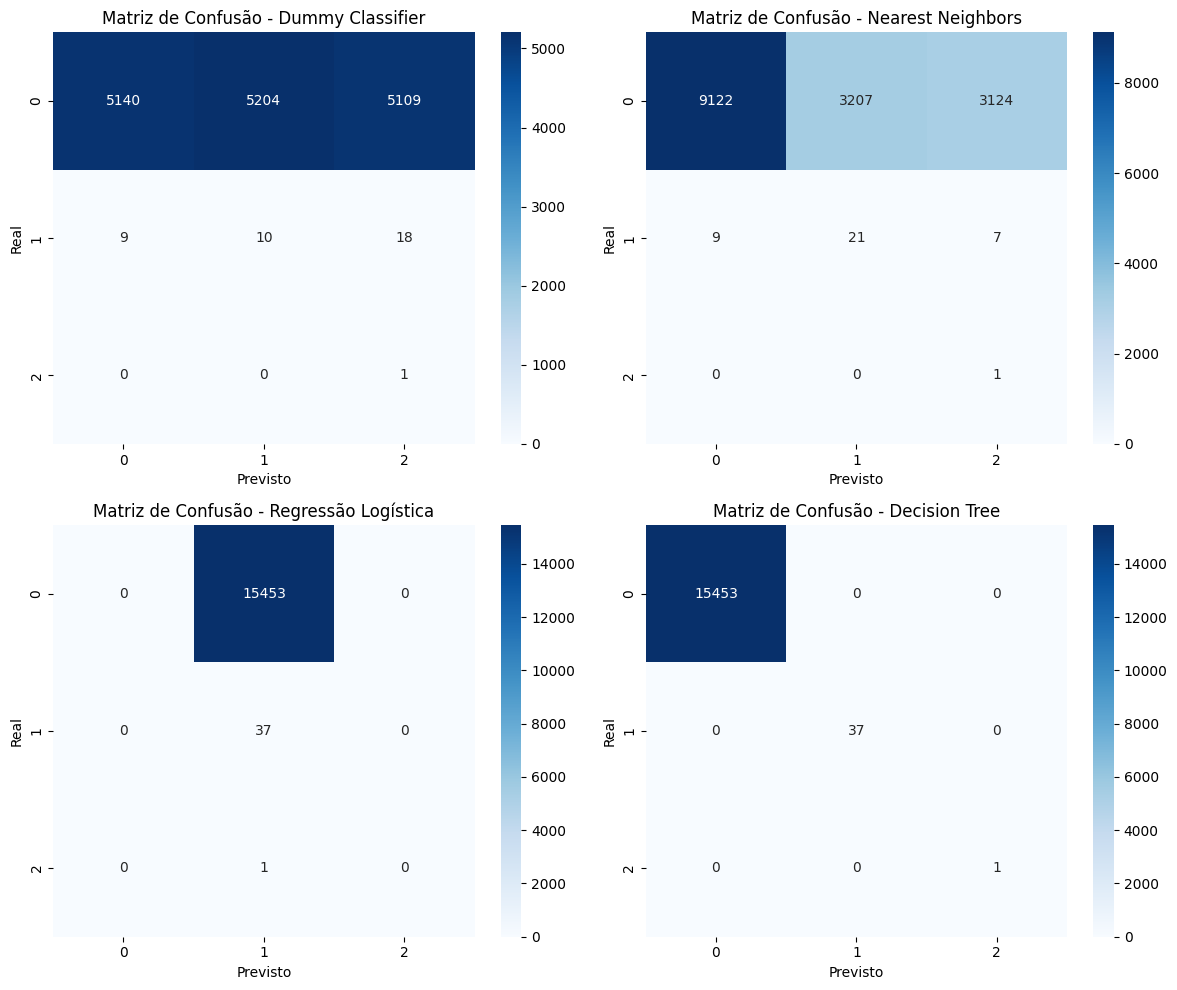

In [23]:
# Assuming X_teste, y_teste, and the trained models are available from previous steps

print('\n--- Matrizes de Confusão ---')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (nome_modelo, modelo) in enumerate(modelos.items()):
    # Make predictions on the test set
    previsoes = modelo.predict(X_teste)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_teste, previsoes)

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Matriz de Confusão - {nome_modelo}')
    axes[i].set_xlabel('Previsto')
    axes[i].set_ylabel('Real')

plt.tight_layout()
plt.show()

As matrizes de confusão confirmam que o Random Forest foi o modelo mais eficaz, com um desempenho quase perfeito em todas as classes. Os resultados do Dummy Classifier, Nearest Neighbors e Regressão Logística demonstram claramente a dificuldade de lidar com dados desbalanceados sem as técnicas adequadas. A matriz de confusão é uma ferramenta visual poderosa para entender não apenas o número de acertos, mas também os tipos de erros que cada modelo cometeu.

O resultado do Random Forest parece perfeito, o que levanta algumas questões e possíveis problemas. Embora o modelo tenha se saído excepcionalmente bem, um desempenho de 100% de precisão e F1-Score pode ser um sinal de alerta como overfiting

# Otimização de hiperparâmetros:

In [24]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10,],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='f1_macro', # Use f1_macro for imbalanced data
                           cv=5,             # Use 3-fold cross-validation
                           n_jobs=-1)          # Use all available cores

# Fit GridSearchCV to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1-macro score found: ", grid_search.best_score_)

# Get the best estimator
best_rf_model = grid_search.best_estimator_

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}
Best F1-macro score found:  1.0


In [25]:
# Best parameters found from GridSearchCV output
best_params = {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 1}

# Create a Random Forest model with the specified parameters
optimized_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Train the optimized model on the resampled training data
print("Training the Random Forest model with specified hyperparameters...")
optimized_rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
previsoes_optimized_rf = optimized_rf_model.predict(X_teste)

# Evaluate the performance
print("\n--- Evaluation of Random Forest Model with Specified Hyperparameters ---")
precisao_optimized_rf = accuracy_score(y_teste, previsoes_optimized_rf)
relatorio_optimized_rf = classification_report(y_teste, previsoes_optimized_rf)

print(f"Precisão (Accuracy): {precisao_optimized_rf:.4f}")
print("\nClassification Report:\n", relatorio_optimized_rf)

Training the Random Forest model with specified hyperparameters...

--- Evaluation of Random Forest Model with Specified Hyperparameters ---
Precisão (Accuracy): 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15453
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00         1

    accuracy                           1.00     15491
   macro avg       1.00      1.00      1.00     15491
weighted avg       1.00      1.00      1.00     15491



# Avaliação

In [26]:
# Best parameters found from GridSearchCV output
best_params = {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}

# Create a Random Forest model with the specified parameters
optimized_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Train the optimized model on the resampled training data
print("Training the Random Forest model with specified hyperparameters...")
optimized_rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
previsoes_optimized_rf = optimized_rf_model.predict(X_teste)

# Evaluate the performance
print("\n--- Evaluation of Random Forest Model with Specified Hyperparameters ---")
precisao_optimized_rf = accuracy_score(y_teste, previsoes_optimized_rf)
relatorio_optimized_rf = classification_report(y_teste, previsoes_optimized_rf)

print(f"Precisão (Accuracy): {precisao_optimized_rf:.4f}")
print("\nClassification Report:\n", relatorio_optimized_rf)

Training the Random Forest model with specified hyperparameters...

--- Evaluation of Random Forest Model with Specified Hyperparameters ---
Precisão (Accuracy): 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15453
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00         1

    accuracy                           1.00     15491
   macro avg       1.00      1.00      1.00     15491
weighted avg       1.00      1.00      1.00     15491



--- Evaluation of Optimized Random Forest Model ---


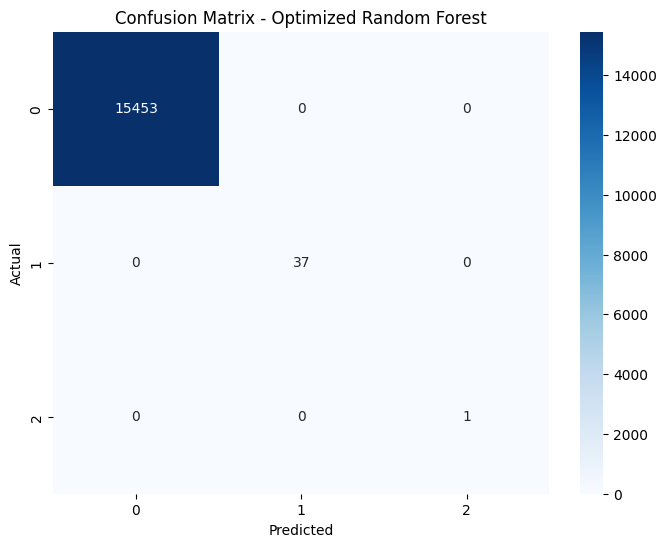


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15453
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00         1

    accuracy                           1.00     15491
   macro avg       1.00      1.00      1.00     15491
weighted avg       1.00      1.00      1.00     15491



In [27]:

# Assuming optimized_rf_model, X_teste, and y_teste are available from previous steps

print("--- Evaluation of Optimized Random Forest Model ---")

# Confusion Matrix
cm = confusion_matrix(y_teste, previsoes_optimized_rf) # previsoes_optimized_rf is from cell HY-1qBW8Kap5
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Optimized Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_teste, previsoes_optimized_rf))